In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
pd.__version__

'2.3.1'

In [4]:
df = pd.read_csv(r"D:\Vishal\Python Projects\dataset\Zomato-data-1.csv")
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
df.rate[2]

'3.8/5'

In [7]:
def rate_change(value):
    value = value.split('/')[0]
    return float(value)    

In [8]:
df['rate'] = df['rate'].apply(rate_change)

In [9]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


In [10]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

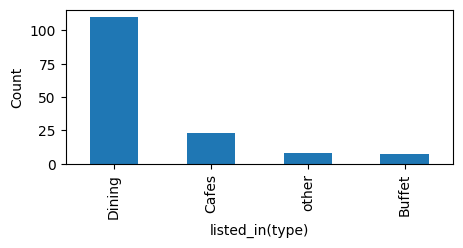

In [11]:
plt.figure(figsize=(5,2))
df['listed_in(type)'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

# Compare Restaurant type by votes

In [12]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

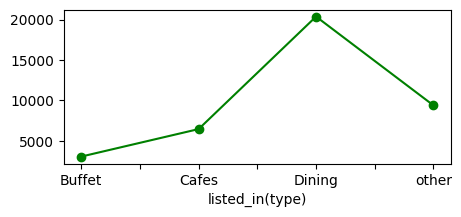

In [13]:
grouped_data.plot(c='green', marker='o',figsize=(5,2))
plt.show()

# Identify Most Voted Restaurant

In [14]:
df[df['votes']==df['votes'].max()]['name']

38    Empire Restaurant
Name: name, dtype: object

# Identify How many Restaurant acceptign Online Order

<Axes: xlabel='online_order'>

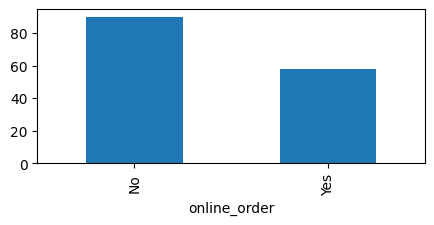

In [15]:
df['online_order'].value_counts().plot(kind='bar',figsize=(5,2))

# Analyze rating Column

<Axes: ylabel='Frequency'>

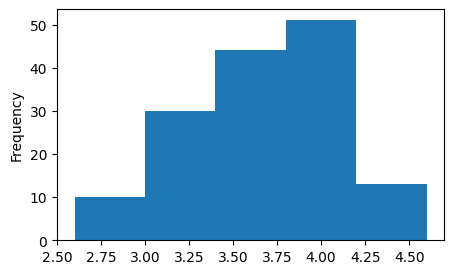

In [16]:
df['rate'].plot(kind='hist',figsize=(5,3),bins=5)

# Highest Approximate Cost for Couples

<Axes: xlabel='approx_cost(for two people)'>

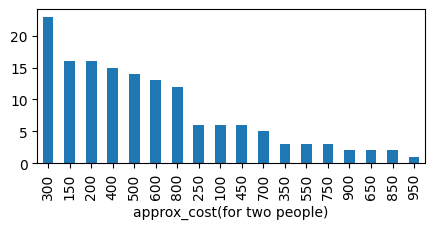

In [17]:
df['approx_cost(for two people)'].value_counts().plot(kind='bar',figsize=(5,2))

# Rating Comparison Of Online vs Offline Order

In [20]:
df.groupby('online_order')['rate'].mean()

online_order
No     3.487778
Yes    3.858621
Name: rate, dtype: float64

<Axes: title={'center': 'rate'}, xlabel='online_order'>

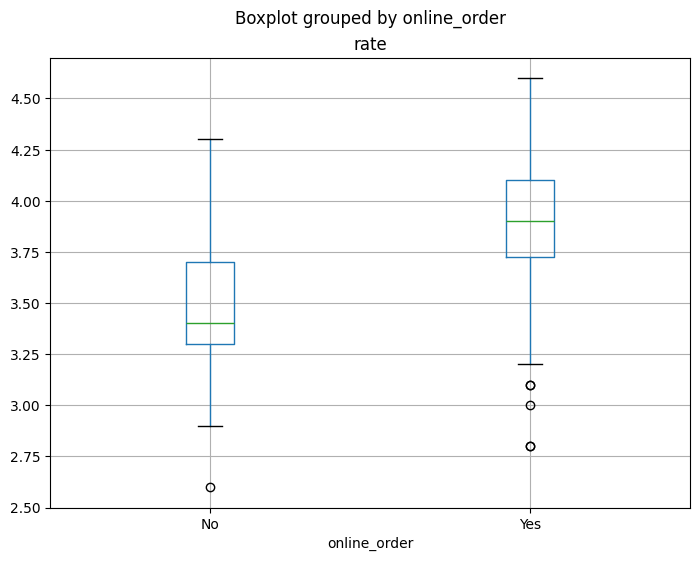

In [25]:
df[['online_order', 'rate']].boxplot(by='online_order', column='rate', figsize=(8, 6))
